In [6]:
# Importamos librerias  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Datos de entrenamiento
X_train = pd.read_csv('../Corpus/resampled_data/X_train_resampled_genero.csv', index_col=0)
y_train = pd.read_csv('../Corpus/resampled_data/y_train_resampled_genero.csv', index_col=0)

print(X_train.shape)
print(y_train.shape)

(191248, 96)
(191248, 1)


(191248, 2)


<Axes: xlabel='C1', ylabel='C2'>

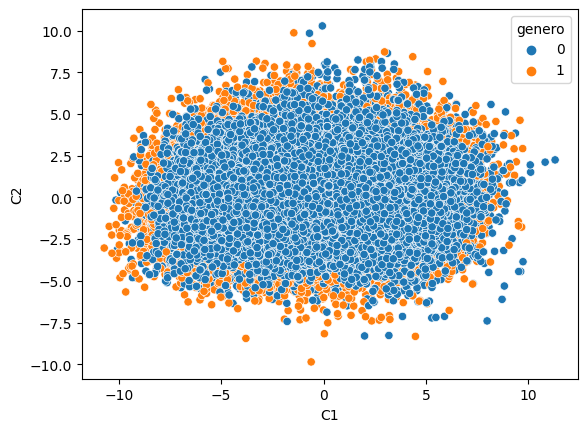

In [8]:
from sklearn.decomposition import PCA

pca_c2 = PCA(n_components=2)
x_train_transformed_pca_c2 = pd.DataFrame(pca_c2.fit_transform(X_train), columns=["C1","C2"])
print(x_train_transformed_pca_c2.shape)
data = pd.concat([x_train_transformed_pca_c2, y_train], axis=1)
sns.scatterplot(data=data, x="C1", y="C2", hue="genero")

(95624, 3)


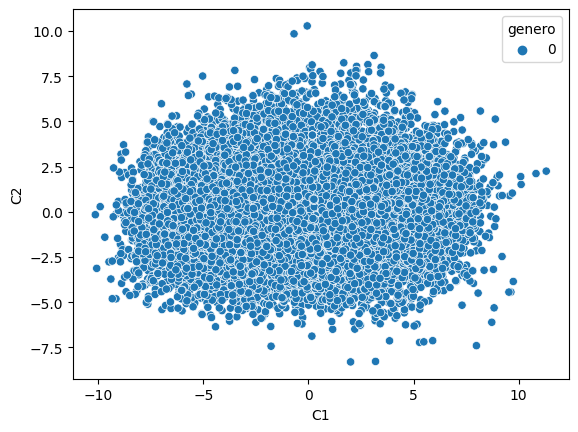

In [12]:
# Extraer las filas donde la columna "clase" sea igual a 0
femenino = data[data['genero'] == 0]
sns.scatterplot(data=femenino, x="C1", y="C2", hue="genero")
print(femenino.shape)

(95624, 3)


<Axes: xlabel='C1', ylabel='C2'>

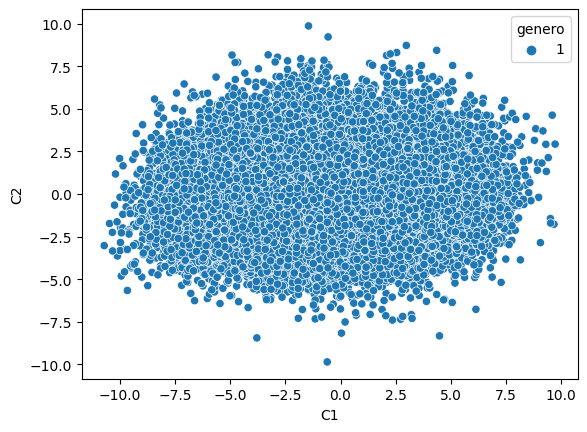

In [13]:
masculino = data[data['genero'] == 1]
print(masculino.shape)
sns.scatterplot(data=masculino, x="C1", y="C2", hue="genero")

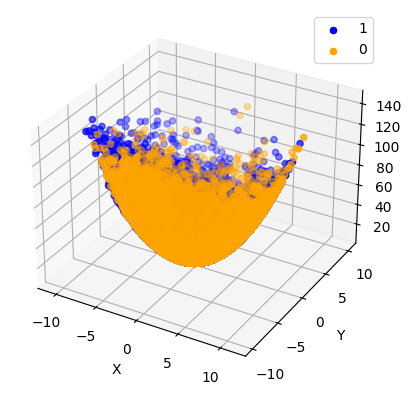

In [5]:
C3 = []
for coord in data.values:
    C3.append((coord[0]**2 + coord[1]**2)+10)

data['C3'] = C3

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

classes = data['genero'].unique()
colors = ['blue','orange']  # Puedes personalizar los colores para cada clase si lo deseas

for clase, color in zip(classes, colors):
    subset =data[data['genero'] == clase]
    ax.scatter(subset['C1'], subset['C2'], subset['C3'], c=color, label=clase)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()

In [4]:
pca = PCA(n_components=3)
x_train_transformed = pd.DataFrame(pca.fit_transform(X_train), columns=["C1","C2","C3"])
print(x_train_transformed.shape)
data = pd.concat([x_train_transformed, y_train], axis=1)
data

(191248, 3)


,C1,C2,C3,genero
0,1.017103,0.617424,-1.577022,1
1,0.325208,-2.252126,-0.384834,1
2,-1.397906,-1.381150,0.779752,1
3,0.558873,-2.179630,-1.375315,1
4,2.455940,-0.553596,-0.683916,1
...,...,...,...,...
191243,-0.290410,-2.359189,-1.668044,0
191244,0.435674,-2.015828,-1.665514,0
191245,-0.481490,0.809026,0.643945,0
191246,-0.484743,0.841150,-0.864355,0


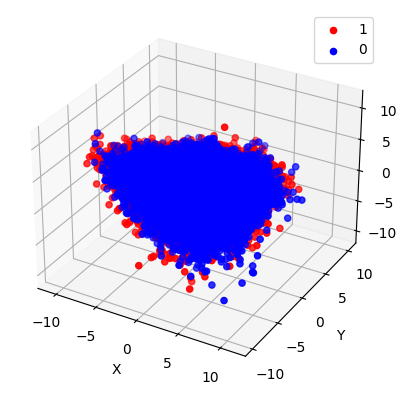

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

classes = data['genero'].unique()
colors = ['red', 'blue','orange']  # Puedes personalizar los colores para cada clase si lo deseas

for clase, color in zip(classes, colors):
    subset =data[data['genero'] == clase]
    ax.scatter(subset['C1'], subset['C2'], subset['C3'], c=color, label=clase)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()
#sns.scatterplot(data=data, x="C1", y="C2", hue="genero")